<a href="https://colab.research.google.com/github/KseniiaTsyganova/bootstrap-regularization/blob/main/BOOTSTRAP_REGULARIZATION_pretrained_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pretrained bootstrap regularization method  

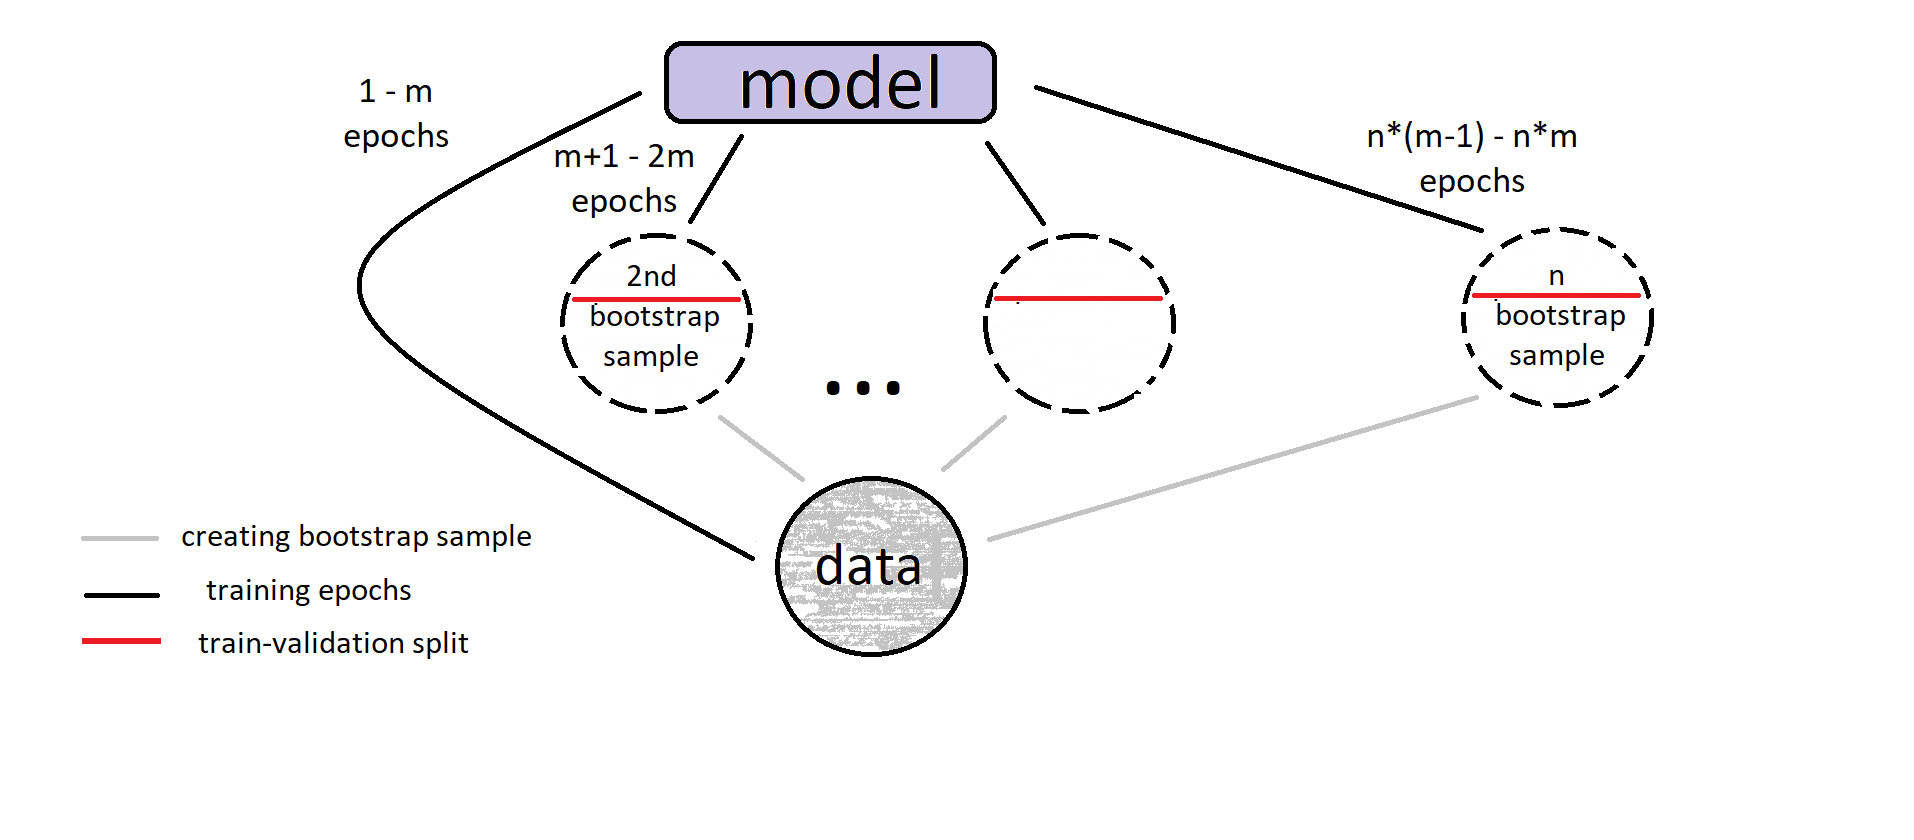

In [2]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
BOOTSTRAP_EPOCHS = 50
BOOTSTRAP_SAMPLES = 9 
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64
EPOCHS = 500
TEST_SIZE = 0.2
RS = 42

For regular training we will create a simple neural network and we will train it during 500 epochs.

For training with bootstrap samples we will create second model with the same architecture. 
We will train our second model on actual data for 50 epochs then we will create 9 bootstrap samples and we will train our model sequentially on each of them for 50 epochs. So the final number of training epochs will be the same as for the first model - 500.

# Binary classification

## Experiment 1
### Mine or rock dataset

sourse:
https://www.kaggle.com/datasets/rupakroy/sonarcsv

In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/sonar.csv')
X = data.drop(['R'], axis=1)
y = np.where(data.R == 'R', 0, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [4]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
3/3 [==============================] - 2s 295ms/step - loss: 0.6977 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5455
Epoch 2/500
3/3 [==============================] - 0s 79ms/step - loss: 0.6790 - accuracy: 0.6742 - val_loss: 0.6991 - val_accuracy: 0.5152
Epoch 3/500
3/3 [==============================] - 0s 45ms/step - loss: 0.6651 - accuracy: 0.6894 - val_loss: 0.6677 - val_accuracy: 0.6061
Epoch 4/500
3/3 [==============================] - 0s 32ms/step - loss: 0.6524 - accuracy: 0.7121 - val_loss: 0.6334 - val_accuracy: 0.6364
Epoch 5/500
3/3 [==============================] - 0s 42ms/step - loss: 0.6465 - accuracy: 0.6515 - val_loss: 0.6194 - val_accuracy: 0.6667
Epoch 6/500
3/3 [==============================] - 0s 45ms/step - loss: 0.6375 - accuracy: 0.6818 - val_loss: 0.6401 - val_accuracy: 0.5758
Epoch 7/500
3/3 [==============================] - 0s 40ms/step - loss: 0.6259 - accuracy: 0.6970 - val_loss: 0.6494 - val_accuracy: 0.5758
Epoch 8/500
3/3 [==

In [5]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

history_2 = model_2.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)



Epoch 1/50
3/3 [==============================] - 1s 107ms/step - loss: 0.6848 - accuracy: 0.5758 - val_loss: 0.6742 - val_accuracy: 0.6061
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6649 - accuracy: 0.6894 - val_loss: 0.6724 - val_accuracy: 0.6970
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.6513 - accuracy: 0.6742 - val_loss: 0.6702 - val_accuracy: 0.6667
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6393 - accuracy: 0.6894 - val_loss: 0.6397 - val_accuracy: 0.6061
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6269 - accuracy: 0.7348 - val_loss: 0.6174 - val_accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6161 - accuracy: 0.7045 - val_loss: 0.5983 - val_accuracy: 0.6970
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6100 - accuracy: 0.6970 - val_loss: 0.5827 - val_accuracy: 0.6667
Epoch 8/50
3/3 [==========

<ipython-input-5-cbb941241891>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 69ms/step - loss: 0.2898 - accuracy: 0.9015 - val_loss: 0.3882 - val_accuracy: 0.7273
Epoch 2/50
3/3 [==============================] - 0s 33ms/step - loss: 0.3114 - accuracy: 0.8409 - val_loss: 0.4319 - val_accuracy: 0.7879
Epoch 3/50
3/3 [==============================] - 0s 24ms/step - loss: 0.3230 - accuracy: 0.8409 - val_loss: 0.3740 - val_accuracy: 0.7879
Epoch 4/50
3/3 [==============================] - 0s 33ms/step - loss: 0.2820 - accuracy: 0.9015 - val_loss: 0.3642 - val_accuracy: 0.8485
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.2638 - accuracy: 0.9318 - val_loss: 0.3616 - val_accuracy: 0.8485
Epoch 6/50
3/3 [==============================] - 0s 32ms/step - loss: 0.2588 - accuracy: 0.9318 - val_loss: 0.3687 - val_accuracy: 0.8182
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.2673 - accuracy: 0.8864 - val_loss: 0.3946 - val_accuracy: 0.8182
Epoch 8/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 20ms/step - loss: 0.2478 - accuracy: 0.9242 - val_loss: 0.3751 - val_accuracy: 0.9091
Epoch 3/50
3/3 [==============================] - 0s 26ms/step - loss: 0.2413 - accuracy: 0.9470 - val_loss: 0.4196 - val_accuracy: 0.8485
Epoch 4/50
3/3 [==============================] - 0s 26ms/step - loss: 0.2643 - accuracy: 0.9015 - val_loss: 0.5625 - val_accuracy: 0.8182
Epoch 5/50
3/3 [==============================] - 0s 29ms/step - loss: 0.2710 - accuracy: 0.8939 - val_loss: 0.4332 - val_accuracy: 0.8182
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.2184 - accuracy: 0.9242 - val_loss: 0.3732 - val_accuracy: 0.9091
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2034 - accuracy: 0.9394 - val_loss: 0.3602 - val_accuracy: 0.9091
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 0.1998 - accuracy: 0.9394 - val_loss: 0.3651 - val_accuracy: 0.9091
Epoch 9/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 18ms/step - loss: 0.2803 - accuracy: 0.8939 - val_loss: 0.2295 - val_accuracy: 0.9091
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.2245 - accuracy: 0.9167 - val_loss: 0.1946 - val_accuracy: 0.9091
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1920 - accuracy: 0.9394 - val_loss: 0.2118 - val_accuracy: 0.9394
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.1804 - accuracy: 0.9545 - val_loss: 0.2252 - val_accuracy: 0.9091
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1781 - accuracy: 0.9470 - val_loss: 0.2262 - val_accuracy: 0.9091
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.1695 - accuracy: 0.9470 - val_loss: 0.2193 - val_accuracy: 0.9091
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 0.1870 - accuracy: 0.9015 - val_loss: 0.2224 - val_accuracy: 0.9091
Epoch 9/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 27ms/step - loss: 0.1862 - accuracy: 0.9318 - val_loss: 0.2292 - val_accuracy: 0.8788
Epoch 3/50
3/3 [==============================] - 0s 27ms/step - loss: 0.1372 - accuracy: 0.9621 - val_loss: 0.2561 - val_accuracy: 0.8485
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 0.1554 - accuracy: 0.9167 - val_loss: 0.2400 - val_accuracy: 0.8485
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.1065 - accuracy: 0.9773 - val_loss: 0.1950 - val_accuracy: 0.9091
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1625 - accuracy: 0.9394 - val_loss: 0.2111 - val_accuracy: 0.8788
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1594 - accuracy: 0.9394 - val_loss: 0.1557 - val_accuracy: 0.9091
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0851 - accuracy: 0.9848 - val_loss: 0.2138 - val_accuracy: 0.8485
Epoch 9/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 84ms/step - loss: 0.1273 - accuracy: 0.9621 - val_loss: 0.2267 - val_accuracy: 0.8788
Epoch 2/50
3/3 [==============================] - 0s 33ms/step - loss: 0.1244 - accuracy: 0.9470 - val_loss: 0.4497 - val_accuracy: 0.7879
Epoch 3/50
3/3 [==============================] - 0s 33ms/step - loss: 0.2974 - accuracy: 0.8712 - val_loss: 0.3304 - val_accuracy: 0.8788
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 0.1697 - accuracy: 0.9091 - val_loss: 0.0991 - val_accuracy: 0.9394
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.1121 - accuracy: 0.9470 - val_loss: 0.2135 - val_accuracy: 0.9091
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2637 - accuracy: 0.8409 - val_loss: 0.0877 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.1093 - accuracy: 0.9545 - val_loss: 0.2653 - val_accuracy: 0.8485
Epoch 8/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 19ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 0.9697
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9697
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.0910 - val_accuracy: 0.9697
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9697
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 9/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 74ms/step - loss: 0.0432 - accuracy: 0.9773 - val_loss: 0.0483 - val_accuracy: 0.9697
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 0.0394 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9697
Epoch 3/50
3/3 [==============================] - 0s 33ms/step - loss: 0.0352 - accuracy: 0.9773 - val_loss: 0.0363 - val_accuracy: 0.9697
Epoch 4/50
3/3 [==============================] - 0s 32ms/step - loss: 0.0363 - accuracy: 0.9773 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 29ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 32ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 8/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 81ms/step - loss: 0.0840 - accuracy: 0.9773 - val_loss: 0.1607 - val_accuracy: 0.9697
Epoch 2/50
3/3 [==============================] - 0s 34ms/step - loss: 0.0570 - accuracy: 0.9773 - val_loss: 0.1122 - val_accuracy: 0.9697
Epoch 3/50
3/3 [==============================] - 0s 32ms/step - loss: 0.0330 - accuracy: 0.9924 - val_loss: 0.0902 - val_accuracy: 0.9697
Epoch 4/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.1003 - val_accuracy: 0.9394
Epoch 5/50
3/3 [==============================] - 0s 35ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.1152 - val_accuracy: 0.9394
Epoch 6/50
3/3 [==============================] - 0s 32ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.1272 - val_accuracy: 0.9394
Epoch 7/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.1333 - val_accuracy: 0.9394
Epoch 8/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


3/3 [==============================] - 0s 20ms/step - loss: 0.0376 - accuracy: 0.9697 - val_loss: 0.1065 - val_accuracy: 0.9394
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1352 - accuracy: 0.9545 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0660 - accuracy: 0.9773 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0481 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.1983 - val_accuracy: 0.9091
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0572 - accuracy: 0.9773 - val_loss: 0.3023 - val_accuracy: 0.8485
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0533 - accuracy: 0.9773 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 9/50
3/3 [======================

<ipython-input-5-cbb941241891>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


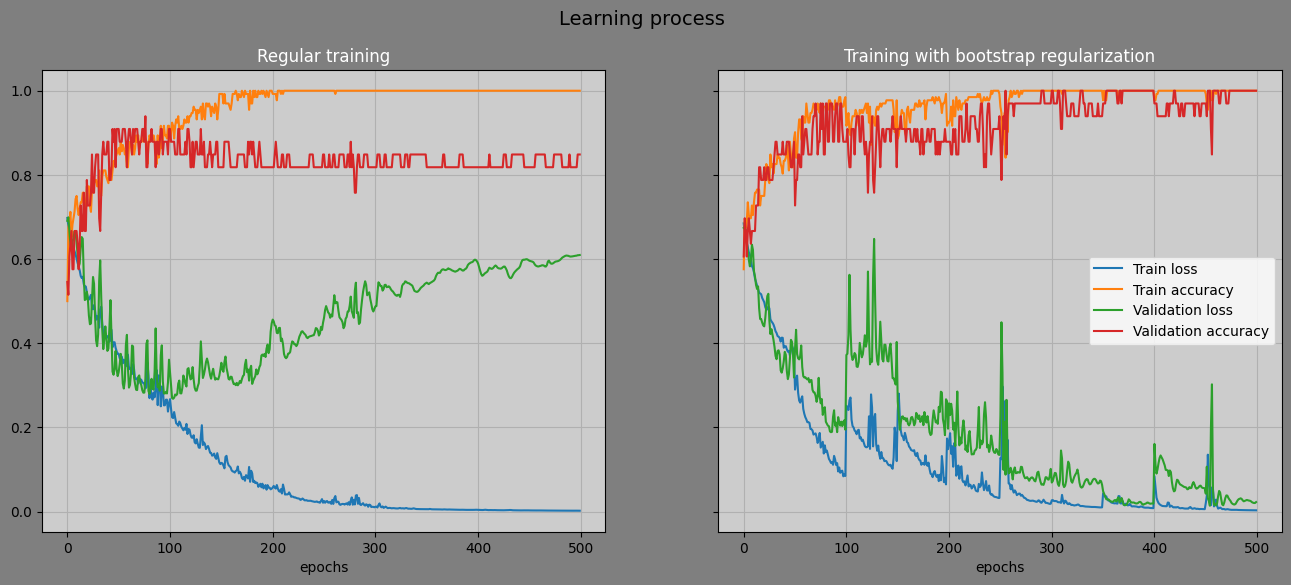

In [6]:

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()



In [7]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


2/2 [==============================] - 0s 7ms/step - loss: 0.2201 - accuracy: 0.9048


,Test accuracy,Test loss
,,
Regular training,0.857143,0.629963
Boostrap regularization,0.904762,0.220083


## Experiment 2
### Sklearn breast cancer dataset

In [8]:
data = load_breast_cancer()
X = data['data']
y = data['target']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [9]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
6/6 [==============================] - 2s 66ms/step - loss: 14.1960 - accuracy: 0.5742 - val_loss: 6.3294 - val_accuracy: 0.4176
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 4.3032 - accuracy: 0.5989 - val_loss: 5.4480 - val_accuracy: 0.7143
Epoch 3/500
6/6 [==============================] - 0s 15ms/step - loss: 2.2458 - accuracy: 0.7720 - val_loss: 1.2439 - val_accuracy: 0.7582
Epoch 4/500
6/6 [==============================] - 0s 18ms/step - loss: 1.2702 - accuracy: 0.8352 - val_loss: 1.4478 - val_accuracy: 0.8242
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 1.3210 - accuracy: 0.8242 - val_loss: 0.5215 - val_accuracy: 0.9451
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 1.3017 - accuracy: 0.8874 - val_loss: 1.0783 - val_accuracy: 0.8571
Epoch 7/500
6/6 [==============================] - 0s 15ms/step - loss: 0.8431 - accuracy: 0.8681 - val_loss: 0.5318 - val_accuracy: 0.9451
Epoch 8/500
6/6 [==

In [10]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'), 
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

history_2 = model_2.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
6/6 [==============================] - 1s 65ms/step - loss: 18.6169 - accuracy: 0.4808 - val_loss: 9.5637 - val_accuracy: 0.4176
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 7.2804 - accuracy: 0.5055 - val_loss: 7.0385 - val_accuracy: 0.5934
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 3.1480 - accuracy: 0.5632 - val_loss: 0.3122 - val_accuracy: 0.9011
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 1.3359 - accuracy: 0.8352 - val_loss: 0.6063 - val_accuracy: 0.8791
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.7716 - accuracy: 0.8242 - val_loss: 1.1651 - val_accuracy: 0.8352
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6409 - accuracy: 0.8929 - val_loss: 0.6530 - val_accuracy: 0.8901
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.8406 - accuracy: 0.8269 - val_loss: 1.2364 - val_accuracy: 0.8132
Epoch 8/50
6/6 [==========

<ipython-input-10-588b3d693eaa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 23ms/step - loss: 0.3851 - accuracy: 0.8874 - val_loss: 0.7042 - val_accuracy: 0.8132
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6914 - accuracy: 0.8516 - val_loss: 0.1939 - val_accuracy: 0.9231
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6034 - accuracy: 0.8379 - val_loss: 0.2188 - val_accuracy: 0.9231
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4119 - accuracy: 0.9093 - val_loss: 0.4209 - val_accuracy: 0.9121
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3456 - accuracy: 0.9203 - val_loss: 0.2689 - val_accuracy: 0.9231
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2790 - accuracy: 0.9341 - val_loss: 0.3303 - val_accuracy: 0.9341
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2199 - accuracy: 0.9478 - val_loss: 0.2384 - val_accuracy: 0.9560
Epoch 8/50
6/6 [=======================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 10ms/step - loss: 0.3431 - accuracy: 0.9176 - val_loss: 0.2429 - val_accuracy: 0.9231
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3474 - accuracy: 0.9231 - val_loss: 0.4675 - val_accuracy: 0.8901
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3199 - accuracy: 0.9121 - val_loss: 0.4472 - val_accuracy: 0.8901
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.3643 - accuracy: 0.8901 - val_loss: 0.2457 - val_accuracy: 0.9231
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2519 - accuracy: 0.9148 - val_loss: 0.2249 - val_accuracy: 0.9231
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2454 - accuracy: 0.9148 - val_loss: 0.2185 - val_accuracy: 0.9231
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2382 - accuracy: 0.9066 - val_loss: 0.1915 - val_accuracy: 0.9451
Epoch 9/50
6/6 [=======================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 35ms/step - loss: 0.2711 - accuracy: 0.9313 - val_loss: 0.2613 - val_accuracy: 0.9011
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2713 - accuracy: 0.9148 - val_loss: 0.3079 - val_accuracy: 0.8901
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.2326 - accuracy: 0.9451 - val_loss: 0.2942 - val_accuracy: 0.9451
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1928 - accuracy: 0.9341 - val_loss: 0.3878 - val_accuracy: 0.9121
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 0.2297 - accuracy: 0.9341 - val_loss: 0.2730 - val_accuracy: 0.9011
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 0.2210 - accuracy: 0.9451 - val_loss: 0.2544 - val_accuracy: 0.9011
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.2171 - accuracy: 0.9368 - val_loss: 0.3816 - val_accuracy: 0.9011
Epoch 8/50
6/6 [======================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 12ms/step - loss: 0.1653 - accuracy: 0.9478 - val_loss: 0.1277 - val_accuracy: 0.9451
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.3510 - accuracy: 0.8956 - val_loss: 0.1119 - val_accuracy: 0.9451
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3488 - accuracy: 0.8736 - val_loss: 0.3533 - val_accuracy: 0.8791
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1969 - accuracy: 0.9286 - val_loss: 0.2385 - val_accuracy: 0.9121
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1942 - accuracy: 0.9286 - val_loss: 0.2077 - val_accuracy: 0.9341
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3335 - accuracy: 0.8929 - val_loss: 0.4986 - val_accuracy: 0.8352
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2883 - accuracy: 0.9121 - val_loss: 0.2402 - val_accuracy: 0.9121
Epoch 9/50
6/6 [===========================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 9ms/step - loss: 0.2164 - accuracy: 0.9258 - val_loss: 0.3558 - val_accuracy: 0.9121
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2136 - accuracy: 0.9396 - val_loss: 0.5656 - val_accuracy: 0.8791
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2173 - accuracy: 0.9341 - val_loss: 0.1735 - val_accuracy: 0.9341
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1068 - accuracy: 0.9533 - val_loss: 0.1385 - val_accuracy: 0.9341
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1531 - accuracy: 0.9451 - val_loss: 0.1305 - val_accuracy: 0.9451
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1233 - accuracy: 0.9560 - val_loss: 0.1434 - val_accuracy: 0.9121
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2456 - accuracy: 0.9203 - val_loss: 0.3134 - val_accuracy: 0.8791
Epoch 9/50
6/6 [=========================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 9ms/step - loss: 0.2880 - accuracy: 0.9038 - val_loss: 0.1861 - val_accuracy: 0.9451
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3601 - accuracy: 0.9121 - val_loss: 0.2771 - val_accuracy: 0.9451
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2879 - accuracy: 0.9286 - val_loss: 0.4193 - val_accuracy: 0.9341
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.3036 - accuracy: 0.9121 - val_loss: 0.3009 - val_accuracy: 0.9451
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1601 - accuracy: 0.9615 - val_loss: 0.2263 - val_accuracy: 0.9231
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1537 - accuracy: 0.9560 - val_loss: 0.1682 - val_accuracy: 0.9451
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1269 - accuracy: 0.9588 - val_loss: 0.2109 - val_accuracy: 0.9341
Epoch 9/50
6/6 [========================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 9ms/step - loss: 0.1361 - accuracy: 0.9505 - val_loss: 0.1175 - val_accuracy: 0.9560
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1331 - accuracy: 0.9560 - val_loss: 0.1556 - val_accuracy: 0.9560
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1659 - accuracy: 0.9313 - val_loss: 0.1457 - val_accuracy: 0.9560
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1480 - accuracy: 0.9533 - val_loss: 0.1065 - val_accuracy: 0.9341
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1689 - accuracy: 0.9451 - val_loss: 0.3143 - val_accuracy: 0.9341
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1665 - accuracy: 0.9478 - val_loss: 0.1193 - val_accuracy: 0.9341
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1102 - accuracy: 0.9588 - val_loss: 0.2065 - val_accuracy: 0.9451
Epoch 9/50
6/6 [============================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 10ms/step - loss: 0.1505 - accuracy: 0.9451 - val_loss: 0.0584 - val_accuracy: 0.9780
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1235 - accuracy: 0.9533 - val_loss: 0.0633 - val_accuracy: 0.9780
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1213 - accuracy: 0.9615 - val_loss: 0.0540 - val_accuracy: 0.9890
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1676 - accuracy: 0.9478 - val_loss: 0.1390 - val_accuracy: 0.9670
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1648 - accuracy: 0.9505 - val_loss: 0.2328 - val_accuracy: 0.9121
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2179 - accuracy: 0.9313 - val_loss: 0.0833 - val_accuracy: 0.9670
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1561 - accuracy: 0.9478 - val_loss: 0.0760 - val_accuracy: 0.9780
Epoch 9/50
6/6 [=========================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


6/6 [==============================] - 0s 30ms/step - loss: 0.1191 - accuracy: 0.9533 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0752 - accuracy: 0.9643 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0685 - accuracy: 0.9670 - val_loss: 0.0490 - val_accuracy: 0.9670
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0727 - accuracy: 0.9670 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0693 - accuracy: 0.9615 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0711 - accuracy: 0.9670 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0661 - accuracy: 0.9780 - val_loss: 0.0505 - val_accuracy: 0.9670
Epoch 8/50
6/6 [======================

<ipython-input-10-588b3d693eaa>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


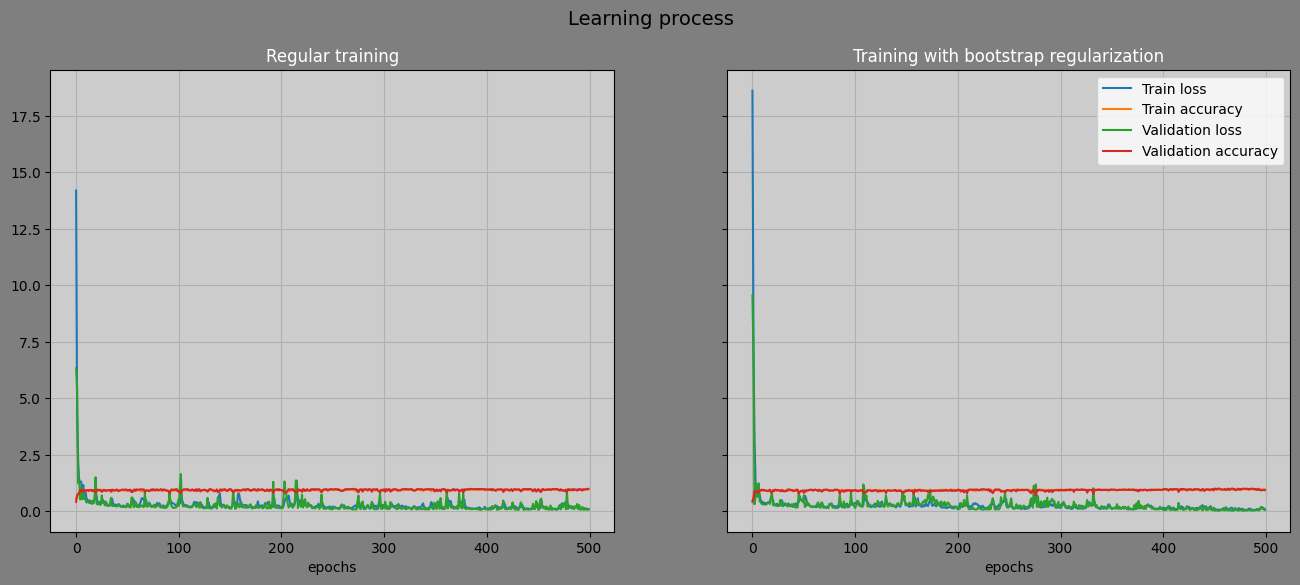

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()


In [12]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


4/4 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8772


,Test accuracy,Test loss
,,
Regular training,0.956140,0.085690
Boostrap regularization,0.877193,0.353703


# Multi-class classification

## Experiment 3
### Sklearn wine dataset

In [13]:
data = load_wine()
X = data['data']
y = data['target']
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [14]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 1s 243ms/step - loss: 33.7888 - accuracy: 0.3894 - val_loss: 12.1682 - val_accuracy: 0.3103
Epoch 2/500
2/2 [==============================] - 0s 33ms/step - loss: 17.8326 - accuracy: 0.3451 - val_loss: 13.5329 - val_accuracy: 0.5862
Epoch 3/500
2/2 [==============================] - 0s 53ms/step - loss: 21.5533 - accuracy: 0.2655 - val_loss: 9.4067 - val_accuracy: 0.5862
Epoch 4/500
2/2 [==============================] - 0s 34ms/step - loss: 14.3094 - accuracy: 0.3009 - val_loss: 18.9677 - val_accuracy: 0.1034
Epoch 5/500
2/2 [==============================] - 0s 35ms/step - loss: 11.0339 - accuracy: 0.3097 - val_loss: 10.8293 - val_accuracy: 0.3103
Epoch 6/500
2/2 [==============================] - 0s 45ms/step - loss: 8.9217 - accuracy: 0.4248 - val_loss: 7.7996 - val_accuracy: 0.3103
Epoch 7/500
2/2 [==============================] - 0s 35ms/step - loss: 6.7430 - accuracy: 0.4425 - val_loss: 2.7648 - val_accuracy: 0.5862
Epoch 8/50

In [15]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

history_2 = model_2.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
2/2 [==============================] - 1s 225ms/step - loss: 25.2704 - accuracy: 0.3982 - val_loss: 67.2280 - val_accuracy: 0.1034
Epoch 2/50
2/2 [==============================] - 0s 58ms/step - loss: 48.6803 - accuracy: 0.3097 - val_loss: 19.3270 - val_accuracy: 0.5862
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 26.4070 - accuracy: 0.2655 - val_loss: 3.9199 - val_accuracy: 0.5862
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 9.9980 - accuracy: 0.3274 - val_loss: 36.2040 - val_accuracy: 0.3103
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 19.2222 - accuracy: 0.3451 - val_loss: 30.1306 - val_accuracy: 0.1034
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 11.7138 - accuracy: 0.3451 - val_loss: 0.8807 - val_accuracy: 0.7931
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 5.8291 - accuracy: 0.4867 - val_loss: 4.5220 - val_accuracy: 0.5862
Epoch 8/50
2/2 [=

<ipython-input-15-926e8f08fb16>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 37ms/step - loss: 0.6771 - accuracy: 0.7522 - val_loss: 0.9979 - val_accuracy: 0.7241
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6818 - accuracy: 0.6726 - val_loss: 1.1055 - val_accuracy: 0.6207
Epoch 4/50
2/2 [==============================] - 0s 48ms/step - loss: 0.5966 - accuracy: 0.7788 - val_loss: 1.0588 - val_accuracy: 0.7241
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6492 - accuracy: 0.7080 - val_loss: 1.2018 - val_accuracy: 0.5862
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6298 - accuracy: 0.7788 - val_loss: 0.9975 - val_accuracy: 0.6207
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6369 - accuracy: 0.6637 - val_loss: 1.0978 - val_accuracy: 0.6207
Epoch 8/50
2/2 [==============================] - 0s 34ms/step - loss: 0.5987 - accuracy: 0.7876 - val_loss: 1.0186 - val_accuracy: 0.7586
Epoch 9/50
2/2 [======================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 48ms/step - loss: 0.7922 - accuracy: 0.7345 - val_loss: 0.4264 - val_accuracy: 0.7931
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6665 - accuracy: 0.7080 - val_loss: 0.4928 - val_accuracy: 0.8276
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6900 - accuracy: 0.7257 - val_loss: 0.3450 - val_accuracy: 0.8276
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.8292 - accuracy: 0.7080 - val_loss: 0.6114 - val_accuracy: 0.8276
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 1.1318 - accuracy: 0.6726 - val_loss: 0.6053 - val_accuracy: 0.8276
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.8403 - accuracy: 0.7611 - val_loss: 0.5033 - val_accuracy: 0.7931
Epoch 8/50
2/2 [==============================] - 0s 56ms/step - loss: 0.8314 - accuracy: 0.7434 - val_loss: 1.1830 - val_accuracy: 0.6897
Epoch 9/50
2/2 [======================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 151ms/step - loss: 0.2911 - accuracy: 0.9204 - val_loss: 0.3266 - val_accuracy: 0.8966
Epoch 2/50
2/2 [==============================] - 0s 51ms/step - loss: 0.2739 - accuracy: 0.9204 - val_loss: 0.2977 - val_accuracy: 0.8966
Epoch 3/50
2/2 [==============================] - 0s 77ms/step - loss: 0.2724 - accuracy: 0.9469 - val_loss: 0.3460 - val_accuracy: 0.8966
Epoch 4/50
2/2 [==============================] - 0s 66ms/step - loss: 0.2825 - accuracy: 0.9027 - val_loss: 0.2846 - val_accuracy: 0.8966
Epoch 5/50
2/2 [==============================] - 0s 50ms/step - loss: 0.2795 - accuracy: 0.8938 - val_loss: 0.3159 - val_accuracy: 0.9310
Epoch 6/50
2/2 [==============================] - 0s 52ms/step - loss: 0.2683 - accuracy: 0.9204 - val_loss: 0.2871 - val_accuracy: 0.9310
Epoch 7/50
2/2 [==============================] - 0s 53ms/step - loss: 0.2669 - accuracy: 0.9292 - val_loss: 0.2718 - val_accuracy: 0.9310
Epoch 8/50
2/2 [=====================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 39ms/step - loss: 0.3404 - accuracy: 0.9115 - val_loss: 0.4982 - val_accuracy: 0.7931
Epoch 3/50
2/2 [==============================] - 0s 49ms/step - loss: 0.4347 - accuracy: 0.7965 - val_loss: 0.2305 - val_accuracy: 0.8621
Epoch 4/50
2/2 [==============================] - 0s 40ms/step - loss: 0.4210 - accuracy: 0.8673 - val_loss: 0.1741 - val_accuracy: 0.9655
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3300 - accuracy: 0.8938 - val_loss: 0.4607 - val_accuracy: 0.7931
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.3894 - accuracy: 0.9115 - val_loss: 0.2820 - val_accuracy: 0.8966
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5285 - accuracy: 0.8319 - val_loss: 0.1761 - val_accuracy: 0.9655
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3591 - accuracy: 0.8761 - val_loss: 0.1850 - val_accuracy: 0.9655
Epoch 9/50
2/2 [======================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 40ms/step - loss: 0.5032 - accuracy: 0.8142 - val_loss: 0.6123 - val_accuracy: 0.6207
Epoch 3/50
2/2 [==============================] - 0s 38ms/step - loss: 0.4482 - accuracy: 0.8407 - val_loss: 0.1981 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 52ms/step - loss: 0.3306 - accuracy: 0.9204 - val_loss: 0.2867 - val_accuracy: 0.8966
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.3553 - accuracy: 0.8938 - val_loss: 0.2318 - val_accuracy: 0.9655
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3086 - accuracy: 0.9115 - val_loss: 0.3193 - val_accuracy: 0.9310
Epoch 7/50
2/2 [==============================] - 0s 54ms/step - loss: 0.2951 - accuracy: 0.9115 - val_loss: 0.1657 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3457 - accuracy: 0.9115 - val_loss: 0.1402 - val_accuracy: 1.0000
Epoch 9/50
2/2 [======================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 150ms/step - loss: 0.1786 - accuracy: 0.9646 - val_loss: 0.1288 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 66ms/step - loss: 0.1629 - accuracy: 0.9469 - val_loss: 0.1634 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 63ms/step - loss: 0.1439 - accuracy: 0.9646 - val_loss: 0.1351 - val_accuracy: 0.9655
Epoch 4/50
2/2 [==============================] - 0s 50ms/step - loss: 0.1597 - accuracy: 0.9735 - val_loss: 0.2057 - val_accuracy: 0.9310
Epoch 5/50
2/2 [==============================] - 0s 50ms/step - loss: 0.1648 - accuracy: 0.9469 - val_loss: 0.1094 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 64ms/step - loss: 0.1658 - accuracy: 0.9735 - val_loss: 0.1429 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 73ms/step - loss: 0.1517 - accuracy: 0.9558 - val_loss: 0.1728 - val_accuracy: 0.9310
Epoch 8/50
2/2 [=====================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 167ms/step - loss: 0.3757 - accuracy: 0.8407 - val_loss: 0.1584 - val_accuracy: 0.9310
Epoch 2/50
2/2 [==============================] - 0s 70ms/step - loss: 0.3641 - accuracy: 0.8584 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 50ms/step - loss: 0.2784 - accuracy: 0.8938 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 63ms/step - loss: 0.2919 - accuracy: 0.8938 - val_loss: 0.2282 - val_accuracy: 0.8966
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.3368 - accuracy: 0.8496 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.3025 - accuracy: 0.9027 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 55ms/step - loss: 0.3388 - accuracy: 0.8673 - val_loss: 0.1479 - val_accuracy: 0.9655
Epoch 8/50
2/2 [=====================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 59ms/step - loss: 0.1202 - accuracy: 0.9646 - val_loss: 0.1092 - val_accuracy: 0.9655
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 0.1068 - accuracy: 0.9735 - val_loss: 0.1565 - val_accuracy: 0.9310
Epoch 4/50
2/2 [==============================] - 0s 42ms/step - loss: 0.1424 - accuracy: 0.9292 - val_loss: 0.1086 - val_accuracy: 0.9655
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0987 - accuracy: 0.9912 - val_loss: 0.1046 - val_accuracy: 0.9655
Epoch 6/50
2/2 [==============================] - 0s 39ms/step - loss: 0.1096 - accuracy: 0.9823 - val_loss: 0.1076 - val_accuracy: 0.9655
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1000 - accuracy: 0.9735 - val_loss: 0.1117 - val_accuracy: 0.9655
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0949 - accuracy: 0.9912 - val_loss: 0.1041 - val_accuracy: 0.9655
Epoch 9/50
2/2 [======================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 40ms/step - loss: 0.1880 - accuracy: 0.9292 - val_loss: 0.0405 - val_accuracy: 0.9655
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1818 - accuracy: 0.9381 - val_loss: 0.0517 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1512 - accuracy: 0.9204 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 38ms/step - loss: 0.1168 - accuracy: 0.9558 - val_loss: 0.0414 - val_accuracy: 0.9655
Epoch 6/50
2/2 [==============================] - 0s 57ms/step - loss: 0.1365 - accuracy: 0.9292 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 0.1400 - accuracy: 0.9469 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.1802 - accuracy: 0.9027 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 9/50
2/2 [======================

<ipython-input-15-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


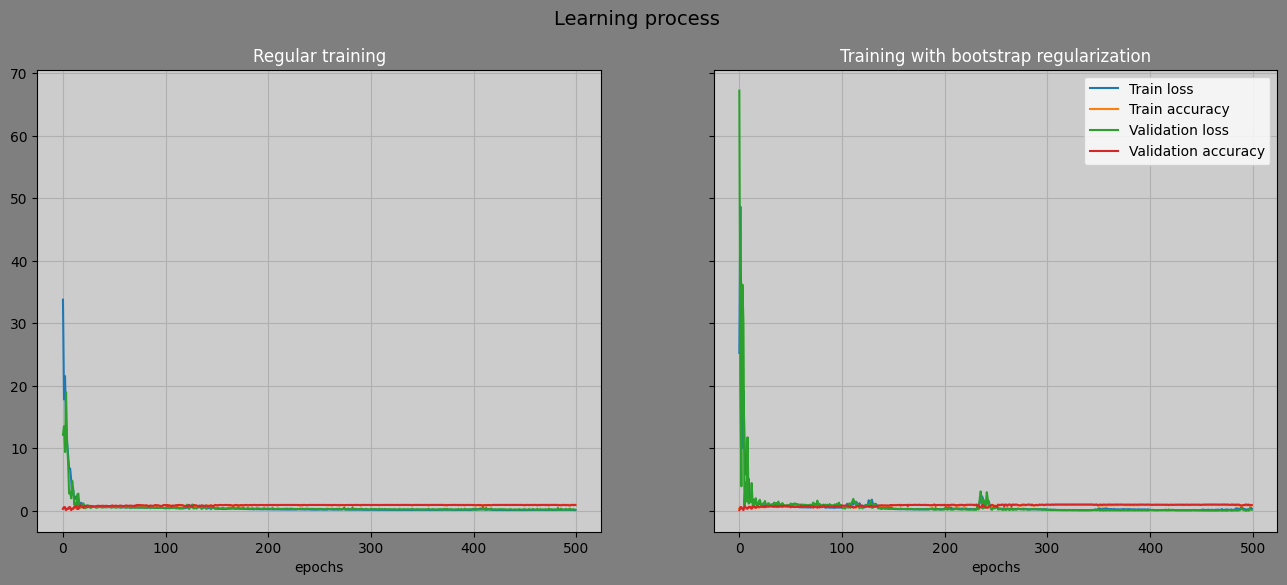

In [16]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()

In [17]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


2/2 [==============================] - 0s 7ms/step - loss: 0.7235 - accuracy: 0.7500


,Test accuracy,Test loss
,,
Regular training,0.888889,0.288675
Boostrap regularization,0.750000,0.723454


## Experiment 4
### Sklearn iris dataset

In [18]:
data = load_iris()
X = data['data']
y = data['target']
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [19]:
model_1 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/500
2/2 [==============================] - 1s 228ms/step - loss: 1.1282 - accuracy: 0.4896 - val_loss: 1.0677 - val_accuracy: 0.3333
Epoch 2/500
2/2 [==============================] - 0s 38ms/step - loss: 1.0190 - accuracy: 0.3333 - val_loss: 1.0055 - val_accuracy: 0.3333
Epoch 3/500
2/2 [==============================] - 0s 37ms/step - loss: 0.9143 - accuracy: 0.4896 - val_loss: 0.8586 - val_accuracy: 0.5833
Epoch 4/500
2/2 [==============================] - 0s 44ms/step - loss: 0.7994 - accuracy: 0.7188 - val_loss: 0.7867 - val_accuracy: 0.8333
Epoch 5/500
2/2 [==============================] - 0s 38ms/step - loss: 0.7256 - accuracy: 0.8125 - val_loss: 0.6912 - val_accuracy: 1.0000
Epoch 6/500
2/2 [==============================] - 0s 54ms/step - loss: 0.6342 - accuracy: 0.8438 - val_loss: 0.6332 - val_accuracy: 0.5833
Epoch 7/500
2/2 [==============================] - 0s 53ms/step - loss: 0.5581 - accuracy: 0.7083 - val_loss: 0.5820 - val_accuracy: 0.5833
Epoch 8/500
2/2 [==

In [20]:
model_2 = Sequential([
    Dense(100, input_dim=INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'), 
    Dense(3, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])

history_2 = model_2.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 1/50
2/2 [==============================] - 2s 327ms/step - loss: 1.0682 - accuracy: 0.4375 - val_loss: 0.8975 - val_accuracy: 0.5833
Epoch 2/50
2/2 [==============================] - 0s 49ms/step - loss: 0.8284 - accuracy: 0.7917 - val_loss: 0.7457 - val_accuracy: 0.7083
Epoch 3/50
2/2 [==============================] - 0s 64ms/step - loss: 0.6948 - accuracy: 0.7500 - val_loss: 0.6337 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 0s 49ms/step - loss: 0.5626 - accuracy: 0.8438 - val_loss: 0.5548 - val_accuracy: 0.6667
Epoch 5/50
2/2 [==============================] - 0s 73ms/step - loss: 0.4766 - accuracy: 0.7708 - val_loss: 0.4965 - val_accuracy: 0.6250
Epoch 6/50
2/2 [==============================] - 0s 52ms/step - loss: 0.4193 - accuracy: 0.7917 - val_loss: 0.4119 - val_accuracy: 0.9167
Epoch 7/50
2/2 [==============================] - 0s 47ms/step - loss: 0.3569 - accuracy: 0.8958 - val_loss: 0.3430 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==========

<ipython-input-20-926e8f08fb16>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 50ms/step - loss: 0.1414 - accuracy: 0.9688 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1916 - val_accuracy: 0.8750
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.1487 - accuracy: 0.9167 - val_loss: 0.0844 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1307 - accuracy: 0.9792 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1402 - accuracy: 0.9688 - val_loss: 0.0715 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 32ms/step - loss: 0.1149 - accuracy: 0.9479 - val_loss: 0.1684 - val_accuracy: 0.8750
Epoch 8/50
2/2 [==============================] - 0s 33ms/step - loss: 0.1289 - accuracy: 0.9271 - val_loss: 0.0730 - val_accuracy: 1.0000
Epoch 9/50
2/2 [======================

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 39ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0258 - accuracy: 0.9896 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0258 - accuracy: 0.9896 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 9/50
2/2 [======================

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 38ms/step - loss: 0.0887 - accuracy: 0.9792 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0801 - accuracy: 0.9792 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 0.0921 - accuracy: 0.9792 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0736 - accuracy: 0.9688 - val_loss: 0.1058 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 47ms/step - loss: 0.1093 - accuracy: 0.9375 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 45ms/step - loss: 0.1004 - accuracy: 0.9583 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0930 - accuracy: 0.9583 - val_loss: 0.1297 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 118ms/step - loss: 0.0476 - accuracy: 0.9896 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0476 - accuracy: 0.9896 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 58ms/step - loss: 0.0478 - accuracy: 0.9896 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0463 - accuracy: 0.9896 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0460 - accuracy: 0.9896 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0475 - accuracy: 0.9896 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 70ms/step - loss: 0.0444 - accuracy: 0.9896 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 8/50
2/2 [=====================

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 42ms/step - loss: 0.0735 - accuracy: 0.9688 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0683 - accuracy: 0.9688 - val_loss: 0.0400 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0681 - accuracy: 0.9688 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 64ms/step - loss: 0.0695 - accuracy: 0.9792 - val_loss: 0.0422 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0651 - accuracy: 0.9688 - val_loss: 0.0704 - val_accuracy: 0.9583
Epoch 7/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0913 - accuracy: 0.9583 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0708 - accuracy: 0.9792 - val_loss: 0.0459 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 39ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.1822 - val_accuracy: 0.9167
Epoch 3/50
2/2 [==============================] - 0s 53ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2300 - val_accuracy: 0.9167
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.1340 - val_accuracy: 0.9167
Epoch 5/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 42ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9583
Epoch 9/50
2/2 [======================

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 128ms/step - loss: 0.0146 - accuracy: 0.9896 - val_loss: 0.2626 - val_accuracy: 0.9583
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2607 - val_accuracy: 0.9167
Epoch 3/50
2/2 [==============================] - 0s 47ms/step - loss: 0.0366 - accuracy: 0.9792 - val_loss: 0.3047 - val_accuracy: 0.9583
Epoch 4/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.3558 - val_accuracy: 0.9583
Epoch 5/50
2/2 [==============================] - 0s 49ms/step - loss: 0.1000 - accuracy: 0.9688 - val_loss: 0.2644 - val_accuracy: 0.9583
Epoch 6/50
2/2 [==============================] - 0s 47ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.1549 - val_accuracy: 0.7500
Epoch 7/50
2/2 [==============================] - 0s 47ms/step - loss: 0.4192 - accuracy: 0.9062 - val_loss: 0.2968 - val_accuracy: 0.9583
Epoch 8/50
2/2 [=====================

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 41ms/step - loss: 0.0702 - accuracy: 0.9896 - val_loss: 5.7693e-04 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0678 - accuracy: 0.9896 - val_loss: 5.9467e-04 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0651 - accuracy: 0.9896 - val_loss: 7.3305e-04 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0608 - accuracy: 0.9896 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0560 - accuracy: 0.9896 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0518 - accuracy: 0.9896 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0524 - accuracy: 0.9896 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 9/50
2/2 [==========

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


2/2 [==============================] - 0s 40ms/step - loss: 0.0179 - accuracy: 0.9896 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 0.0142 - accuracy: 0.9896 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 9/50
2/2 [======================

<ipython-input-20-926e8f08fb16>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


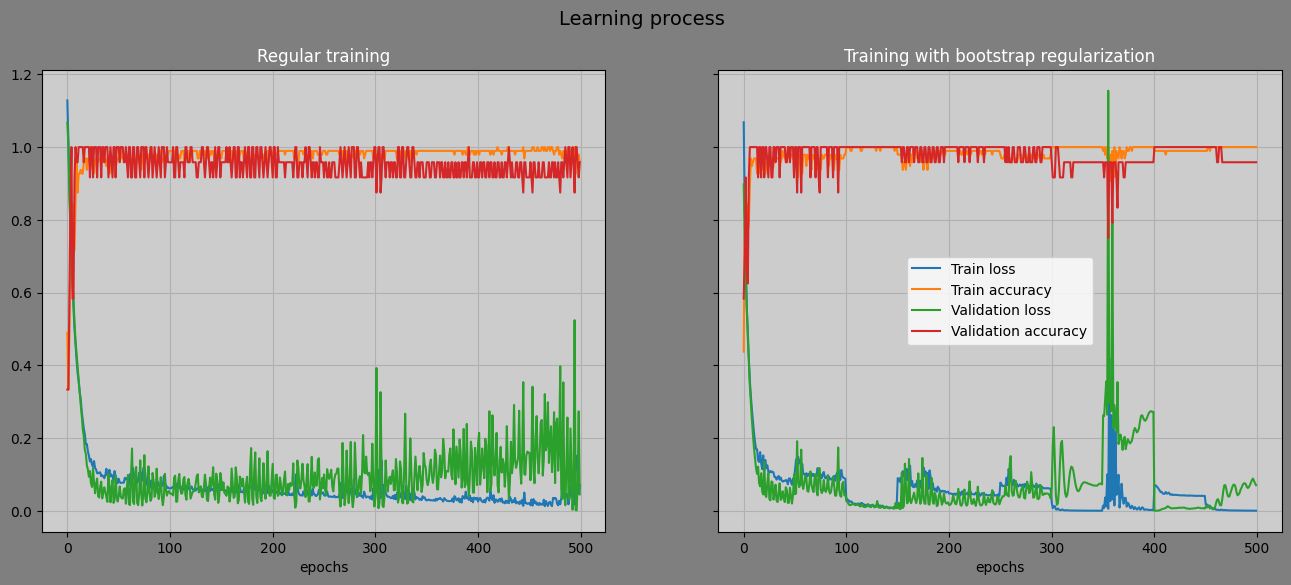

In [21]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train accuracy', 'Validation loss', 'Validation accuracy'], loc='best')
plt.show()

In [22]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test accuracy': [accuracy_1, accuracy_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


1/1 [==============================] - 0s 251ms/step - loss: 0.0141 - accuracy: 1.0000


,Test accuracy,Test loss
,,
Regular training,1.000000,0.030968
Boostrap regularization,1.000000,0.014075


# Regression

## Experiment 5
### Sklearn diabetes dataset

In [23]:
data = load_diabetes()
X = data['data']
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]


In [24]:
model_1 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_1.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

# Train first model

history_1 = model_1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/500
5/5 [==============================] - 3s 111ms/step - loss: 31498.8301 - mean_absolute_error: 158.5828 - val_loss: 22359.6699 - val_mean_absolute_error: 133.6301
Epoch 2/500
5/5 [==============================] - 0s 32ms/step - loss: 31107.6641 - mean_absolute_error: 157.3692 - val_loss: 21330.8574 - val_mean_absolute_error: 129.7923
Epoch 3/500
5/5 [==============================] - 0s 38ms/step - loss: 28386.7480 - mean_absolute_error: 148.6684 - val_loss: 15402.4297 - val_mean_absolute_error: 105.0933
Epoch 4/500
5/5 [==============================] - 0s 26ms/step - loss: 15834.5303 - mean_absolute_error: 102.1693 - val_loss: 4718.8721 - val_mean_absolute_error: 59.3584
Epoch 5/500
5/5 [==============================] - 0s 19ms/step - loss: 9193.2842 - mean_absolute_error: 81.2810 - val_loss: 4503.1089 - val_mean_absolute_error: 58.1304
Epoch 6/500
5/5 [==============================] - 0s 26ms/step - loss: 5116.9092 - mean_absolute_error: 58.3028 - val_loss: 4708.8096 

In [25]:
model_2 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_2.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

df = pd.DataFrame(columns=['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

history_2 = model_2.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

Epoch 1/50
5/5 [==============================] - 2s 65ms/step - loss: 31508.2988 - mean_absolute_error: 158.6137 - val_loss: 22398.3809 - val_mean_absolute_error: 133.7681
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 31234.3789 - mean_absolute_error: 157.7503 - val_loss: 21632.3672 - val_mean_absolute_error: 130.8779
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 29232.7695 - mean_absolute_error: 151.2706 - val_loss: 16908.8965 - val_mean_absolute_error: 111.4544
Epoch 4/50
5/5 [==============================] - 0s 23ms/step - loss: 19146.2500 - mean_absolute_error: 114.7776 - val_loss: 4357.4512 - val_mean_absolute_error: 53.5249
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 9801.2871 - mean_absolute_error: 85.1114 - val_loss: 6442.9038 - val_mean_absolute_error: 69.7901
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 5818.2246 - mean_absolute_error: 63.8524 - val_loss: 4449.4097 - val_m

<ipython-input-25-9af3889988a2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 31ms/step - loss: 2706.0437 - mean_absolute_error: 42.3779 - val_loss: 3288.8977 - val_mean_absolute_error: 46.1272
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 2587.0349 - mean_absolute_error: 41.5276 - val_loss: 3250.5151 - val_mean_absolute_error: 46.0043
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 2536.0188 - mean_absolute_error: 40.8138 - val_loss: 3241.0144 - val_mean_absolute_error: 45.7087
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 2489.4082 - mean_absolute_error: 40.5908 - val_loss: 3237.0913 - val_mean_absolute_error: 45.8925
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 2455.9299 - mean_absolute_error: 40.1800 - val_loss: 3222.3308 - val_mean_absolute_error: 45.6543
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 2385.4172 - mean_absolute_error: 39.6718 - val_loss: 3268.7070 - val_mean_absolute_error: 46.00

<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 30ms/step - loss: 2793.3689 - mean_absolute_error: 40.6653 - val_loss: 1945.7539 - val_mean_absolute_error: 36.9943
Epoch 2/50
5/5 [==============================] - 0s 21ms/step - loss: 2678.4438 - mean_absolute_error: 40.6849 - val_loss: 2402.0598 - val_mean_absolute_error: 38.8046
Epoch 3/50
5/5 [==============================] - 0s 26ms/step - loss: 2454.8833 - mean_absolute_error: 39.1119 - val_loss: 2588.2981 - val_mean_absolute_error: 42.9841
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 2532.0137 - mean_absolute_error: 40.4778 - val_loss: 2237.8325 - val_mean_absolute_error: 37.8659
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 2286.2148 - mean_absolute_error: 37.9583 - val_loss: 2118.8428 - val_mean_absolute_error: 39.2145
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 2091.8892 - mean_absolute_error: 36.0821 - val_loss: 2152.0750 - val_mean_absolute_error: 37.52

<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 49ms/step - loss: 1672.9707 - mean_absolute_error: 28.9082 - val_loss: 1211.3256 - val_mean_absolute_error: 25.3394
Epoch 2/50
5/5 [==============================] - 0s 30ms/step - loss: 1688.9504 - mean_absolute_error: 30.6005 - val_loss: 1530.8059 - val_mean_absolute_error: 27.7035
Epoch 3/50
5/5 [==============================] - 0s 34ms/step - loss: 1791.2356 - mean_absolute_error: 32.4020 - val_loss: 2250.5193 - val_mean_absolute_error: 35.9661
Epoch 4/50
5/5 [==============================] - 0s 35ms/step - loss: 2286.3713 - mean_absolute_error: 37.9362 - val_loss: 1095.9972 - val_mean_absolute_error: 25.1631
Epoch 5/50
5/5 [==============================] - 0s 32ms/step - loss: 1899.5187 - mean_absolute_error: 34.1306 - val_loss: 1874.4694 - val_mean_absolute_error: 36.6842
Epoch 6/50
5/5 [==============================] - 0s 29ms/step - loss: 1403.1481 - mean_absolute_error: 29.7633 - val_loss: 1191.0701 - val_mean_absolute_error: 26.30

<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 32ms/step - loss: 1241.4045 - mean_absolute_error: 22.8954 - val_loss: 1891.5828 - val_mean_absolute_error: 30.7919
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 1081.6151 - mean_absolute_error: 23.2530 - val_loss: 2279.1577 - val_mean_absolute_error: 37.5288
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 1078.6741 - mean_absolute_error: 24.2435 - val_loss: 1915.1417 - val_mean_absolute_error: 33.2169
Epoch 4/50
5/5 [==============================] - 0s 23ms/step - loss: 867.0009 - mean_absolute_error: 21.6783 - val_loss: 1674.0787 - val_mean_absolute_error: 29.4740
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 852.4498 - mean_absolute_error: 22.0411 - val_loss: 1260.9939 - val_mean_absolute_error: 23.9177
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 671.9377 - mean_absolute_error: 18.8488 - val_loss: 1248.6404 - val_mean_absolute_error: 23.5332


<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 34ms/step - loss: 790.5217 - mean_absolute_error: 17.4845 - val_loss: 1354.7306 - val_mean_absolute_error: 26.1804
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 629.2347 - mean_absolute_error: 18.2269 - val_loss: 1144.0961 - val_mean_absolute_error: 23.8322
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 492.4481 - mean_absolute_error: 16.5251 - val_loss: 1064.0809 - val_mean_absolute_error: 23.2774
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 420.5927 - mean_absolute_error: 15.3572 - val_loss: 1111.2155 - val_mean_absolute_error: 24.6046
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 404.0995 - mean_absolute_error: 15.1153 - val_loss: 1246.0369 - val_mean_absolute_error: 25.3244
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 368.6145 - mean_absolute_error: 13.9919 - val_loss: 1120.9132 - val_mean_absolute_error: 26.9023
Epo

<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 34ms/step - loss: 987.9924 - mean_absolute_error: 19.2771 - val_loss: 618.2134 - val_mean_absolute_error: 18.5164
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 910.9732 - mean_absolute_error: 21.3097 - val_loss: 899.5508 - val_mean_absolute_error: 22.4955
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 1017.4439 - mean_absolute_error: 23.7751 - val_loss: 1589.6263 - val_mean_absolute_error: 32.9764
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 1327.2311 - mean_absolute_error: 27.8929 - val_loss: 1085.3619 - val_mean_absolute_error: 25.5133
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 875.2837 - mean_absolute_error: 22.4415 - val_loss: 900.5460 - val_mean_absolute_error: 21.8597
Epoch 6/50
5/5 [==============================] - 0s 27ms/step - loss: 753.4943 - mean_absolute_error: 20.5811 - val_loss: 590.5289 - val_mean_absolute_error: 19.1476
Epoch

<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 30ms/step - loss: 491.9115 - mean_absolute_error: 14.0662 - val_loss: 923.0244 - val_mean_absolute_error: 18.5229
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 378.4171 - mean_absolute_error: 14.0312 - val_loss: 898.5237 - val_mean_absolute_error: 16.4311
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 254.4354 - mean_absolute_error: 11.3858 - val_loss: 1054.9369 - val_mean_absolute_error: 18.5521
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 214.8378 - mean_absolute_error: 10.3701 - val_loss: 952.0099 - val_mean_absolute_error: 18.2815
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 225.9383 - mean_absolute_error: 10.9576 - val_loss: 941.3432 - val_mean_absolute_error: 19.5638
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 232.6248 - mean_absolute_error: 10.9377 - val_loss: 898.2228 - val_mean_absolute_error: 21.5733
Epoch 7/

<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


Epoch 2/50
5/5 [==============================] - 0s 27ms/step - loss: 364.1193 - mean_absolute_error: 14.6417 - val_loss: 467.7560 - val_mean_absolute_error: 16.8692
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 296.3281 - mean_absolute_error: 13.5227 - val_loss: 772.0069 - val_mean_absolute_error: 22.2722
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 304.5724 - mean_absolute_error: 13.7510 - val_loss: 505.4053 - val_mean_absolute_error: 17.4787
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 208.0682 - mean_absolute_error: 11.0134 - val_loss: 544.8132 - val_mean_absolute_error: 17.0616
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 207.0971 - mean_absolute_error: 11.2542 - val_loss: 512.8716 - val_mean_absolute_error: 17.0013
Epoch 7/50
5/5 [==============================] - 0s 25ms/step - loss: 202.7888 - mean_absolute_error: 10.8155 - val_loss: 407.9577 - val_mean_absolute_error: 14.453

<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


5/5 [==============================] - 0s 32ms/step - loss: 502.4131 - mean_absolute_error: 13.8271 - val_loss: 461.5875 - val_mean_absolute_error: 14.5021
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 320.3334 - mean_absolute_error: 13.0043 - val_loss: 323.7265 - val_mean_absolute_error: 12.4645
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 314.3994 - mean_absolute_error: 12.8604 - val_loss: 443.4967 - val_mean_absolute_error: 15.7254
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 380.5218 - mean_absolute_error: 14.9144 - val_loss: 434.1178 - val_mean_absolute_error: 15.8637
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 301.6082 - mean_absolute_error: 13.2696 - val_loss: 278.3718 - val_mean_absolute_error: 13.3218
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 255.0975 - mean_absolute_error: 12.0670 - val_loss: 238.6213 - val_mean_absolute_error: 12.3640
Epoch 7/5

<ipython-input-25-9af3889988a2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


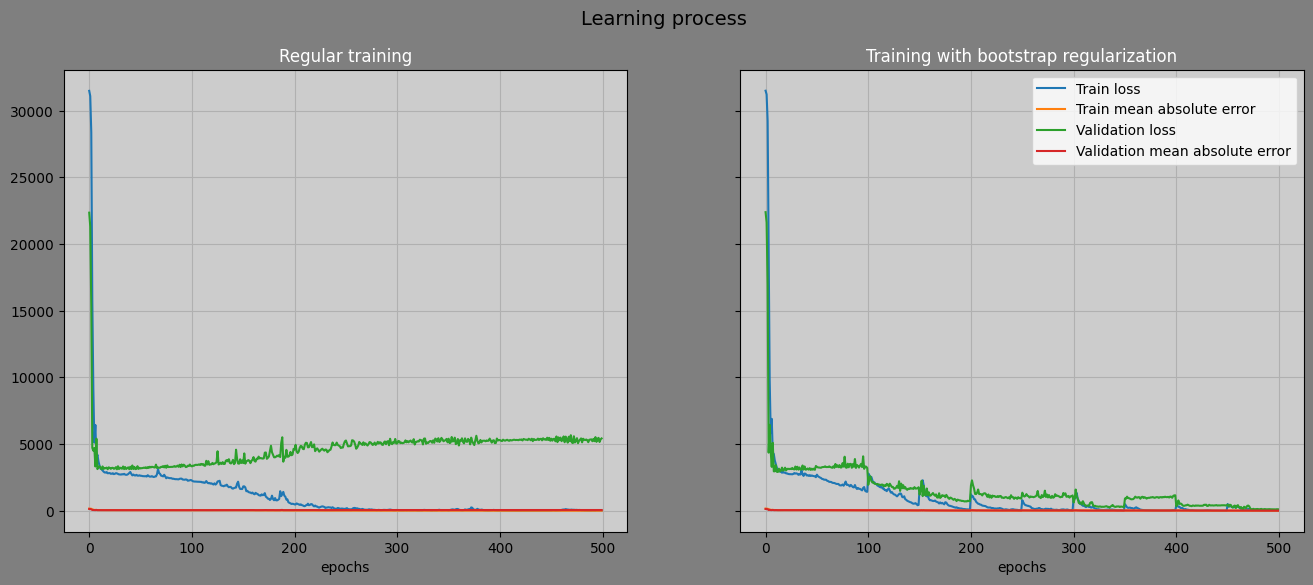

In [26]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train mean absolute error', 'Validation loss', 'Validation mean absolute error'], loc='best')
plt.show()

In [27]:
loss_1, mae_1 = model_1.evaluate(x_test, y_test)
loss_2, mae_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test mean absolute error': [mae_1, mae_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


3/3 [==============================] - 0s 6ms/step - loss: 5321.2642 - mean_absolute_error: 55.8713


,Test mean absolute error,Test loss
,,
Regular training,59.158840,5664.109375
Boostrap regularization,55.871269,5321.264160


## Experiment 6
### sklearn fetch california housing dataset

In [9]:
data = fetch_california_housing()

y = data['target']
X = data['data']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RS)
x_train = pd.DataFrame(x_train)

BOOTSTRAP_SAMPLE = len(x_train)
INPUT_DIM = x_train.shape[1]

In [10]:
model_1 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_1.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

history_1 = model_1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/500
207/207 [==============================] - 5s 18ms/step - loss: 26.4140 - mean_absolute_error: 1.8269 - val_loss: 1.5765 - val_mean_absolute_error: 1.0314
Epoch 2/500
207/207 [==============================] - 4s 17ms/step - loss: 3.2564 - mean_absolute_error: 1.1497 - val_loss: 2.1783 - val_mean_absolute_error: 1.1896
Epoch 3/500
207/207 [==============================] - 3s 13ms/step - loss: 1.7014 - mean_absolute_error: 1.0092 - val_loss: 2.0642 - val_mean_absolute_error: 1.0957
Epoch 4/500
207/207 [==============================] - 3s 12ms/step - loss: 1.3151 - mean_absolute_error: 0.9070 - val_loss: 1.3027 - val_mean_absolute_error: 0.9042
Epoch 5/500
207/207 [==============================] - 5s 23ms/step - loss: 1.3238 - mean_absolute_error: 0.9095 - val_loss: 1.2108 - val_mean_absolute_error: 0.8560
Epoch 6/500
207/207 [==============================] - 6s 30ms/step - loss: 1.0187 - mean_absolute_error: 0.7943 - val_loss: 0.8192 - val_mean_absolute_error: 0.6469
Epo

In [11]:
model_2 = Sequential([
    Dense(100, input_dim = INPUT_DIM, activation='relu'),
    Dense(200, activation='relu'),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)]
)

model_2.compile(optimizer='adam', loss="mean_squared_error", metrics=['mean_absolute_error'])

df = pd.DataFrame(columns=['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

history_2 = model_2.fit(x_train, y_train, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

for i in range(BOOTSTRAP_SAMPLES):
    train_data = x_train.sample(BOOTSTRAP_SAMPLE, replace=True)
    train_target = y_train[train_data.index]

    history_2 = model_2.fit(train_data, train_target, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, epochs=BOOTSTRAP_EPOCHS)
    df = df.append(pd.DataFrame(history_2.history), ignore_index=True)

Epoch 1/50
207/207 [==============================] - 6s 18ms/step - loss: 66.2489 - mean_absolute_error: 2.1689 - val_loss: 1.3238 - val_mean_absolute_error: 0.9006
Epoch 2/50
207/207 [==============================] - 3s 12ms/step - loss: 1.4304 - mean_absolute_error: 0.9462 - val_loss: 1.8182 - val_mean_absolute_error: 0.9968
Epoch 3/50
207/207 [==============================] - 3s 13ms/step - loss: 1.9497 - mean_absolute_error: 1.0182 - val_loss: 1.3722 - val_mean_absolute_error: 0.8807
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 1.3751 - mean_absolute_error: 0.9266 - val_loss: 1.3317 - val_mean_absolute_error: 0.8742
Epoch 5/50
207/207 [==============================] - 4s 19ms/step - loss: 1.2999 - mean_absolute_error: 0.9008 - val_loss: 1.5050 - val_mean_absolute_error: 1.0278
Epoch 6/50
207/207 [==============================] - 3s 15ms/step - loss: 1.2536 - mean_absolute_error: 0.8816 - val_loss: 0.9446 - val_mean_absolute_error: 0.7947
Epoch 7/5

<ipython-input-11-d624810521cd>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 2s 12ms/step - loss: 0.4915 - mean_absolute_error: 0.5223 - val_loss: 0.5133 - val_mean_absolute_error: 0.5481
Epoch 2/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4938 - mean_absolute_error: 0.5244 - val_loss: 0.4868 - val_mean_absolute_error: 0.5287
Epoch 3/50
207/207 [==============================] - 4s 20ms/step - loss: 0.4917 - mean_absolute_error: 0.5220 - val_loss: 0.4770 - val_mean_absolute_error: 0.5242
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4967 - mean_absolute_error: 0.5273 - val_loss: 0.4801 - val_mean_absolute_error: 0.5098
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4953 - mean_absolute_error: 0.5248 - val_loss: 0.4954 - val_mean_absolute_error: 0.5438
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4771 - mean_absolute_error: 0.5150 - val_loss: 0.6178 - val_mean_absolute_error: 0.5688
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 4s 21ms/step - loss: 0.4836 - mean_absolute_error: 0.5186 - val_loss: 0.4580 - val_mean_absolute_error: 0.4904
Epoch 2/50
207/207 [==============================] - 3s 14ms/step - loss: 0.4561 - mean_absolute_error: 0.5034 - val_loss: 0.4635 - val_mean_absolute_error: 0.4947
Epoch 3/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4462 - mean_absolute_error: 0.4959 - val_loss: 0.4976 - val_mean_absolute_error: 0.5429
Epoch 4/50
207/207 [==============================] - 3s 14ms/step - loss: 0.4568 - mean_absolute_error: 0.5043 - val_loss: 0.6022 - val_mean_absolute_error: 0.5513
Epoch 5/50
207/207 [==============================] - 4s 19ms/step - loss: 0.4455 - mean_absolute_error: 0.4943 - val_loss: 0.4522 - val_mean_absolute_error: 0.5027
Epoch 6/50
207/207 [==============================] - 3s 16ms/step - loss: 0.4620 - mean_absolute_error: 0.5052 - val_loss: 0.4487 - val_mean_absolute_error: 0.5060
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 2s 12ms/step - loss: 0.4268 - mean_absolute_error: 0.4796 - val_loss: 0.4426 - val_mean_absolute_error: 0.5166
Epoch 2/50
207/207 [==============================] - 2s 11ms/step - loss: 0.4332 - mean_absolute_error: 0.4874 - val_loss: 0.4136 - val_mean_absolute_error: 0.4529
Epoch 3/50
207/207 [==============================] - 3s 14ms/step - loss: 0.4076 - mean_absolute_error: 0.4693 - val_loss: 0.3910 - val_mean_absolute_error: 0.4485
Epoch 4/50
207/207 [==============================] - 4s 19ms/step - loss: 0.4069 - mean_absolute_error: 0.4703 - val_loss: 0.4373 - val_mean_absolute_error: 0.4624
Epoch 5/50
207/207 [==============================] - 3s 12ms/step - loss: 0.4126 - mean_absolute_error: 0.4739 - val_loss: 0.4298 - val_mean_absolute_error: 0.4982
Epoch 6/50
207/207 [==============================] - 2s 12ms/step - loss: 0.4194 - mean_absolute_error: 0.4783 - val_loss: 0.3813 - val_mean_absolute_error: 0.4393
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 4s 18ms/step - loss: 0.4224 - mean_absolute_error: 0.4728 - val_loss: 0.5147 - val_mean_absolute_error: 0.5077
Epoch 2/50
207/207 [==============================] - 4s 17ms/step - loss: 0.4109 - mean_absolute_error: 0.4698 - val_loss: 0.4219 - val_mean_absolute_error: 0.4752
Epoch 3/50
207/207 [==============================] - 3s 13ms/step - loss: 0.4156 - mean_absolute_error: 0.4737 - val_loss: 0.5583 - val_mean_absolute_error: 0.5880
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3915 - mean_absolute_error: 0.4579 - val_loss: 0.4093 - val_mean_absolute_error: 0.4596
Epoch 5/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3955 - mean_absolute_error: 0.4582 - val_loss: 0.4165 - val_mean_absolute_error: 0.4636
Epoch 6/50
207/207 [==============================] - 4s 20ms/step - loss: 0.3903 - mean_absolute_error: 0.4561 - val_loss: 0.4395 - val_mean_absolute_error: 0.5031
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 13ms/step - loss: 0.3850 - mean_absolute_error: 0.4517 - val_loss: 0.3564 - val_mean_absolute_error: 0.4415
Epoch 2/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3639 - mean_absolute_error: 0.4379 - val_loss: 0.3504 - val_mean_absolute_error: 0.4242
Epoch 3/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3776 - mean_absolute_error: 0.4485 - val_loss: 0.3732 - val_mean_absolute_error: 0.4397
Epoch 4/50
207/207 [==============================] - 4s 18ms/step - loss: 0.3562 - mean_absolute_error: 0.4337 - val_loss: 0.3323 - val_mean_absolute_error: 0.4257
Epoch 5/50
207/207 [==============================] - 3s 15ms/step - loss: 0.3673 - mean_absolute_error: 0.4420 - val_loss: 0.3230 - val_mean_absolute_error: 0.4136
Epoch 6/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3578 - mean_absolute_error: 0.4333 - val_loss: 0.3406 - val_mean_absolute_error: 0.4275
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 12ms/step - loss: 0.3926 - mean_absolute_error: 0.4546 - val_loss: 0.3920 - val_mean_absolute_error: 0.4520
Epoch 2/50
207/207 [==============================] - 3s 15ms/step - loss: 0.3714 - mean_absolute_error: 0.4442 - val_loss: 0.4236 - val_mean_absolute_error: 0.4751
Epoch 3/50
207/207 [==============================] - 4s 19ms/step - loss: 0.3571 - mean_absolute_error: 0.4333 - val_loss: 0.4963 - val_mean_absolute_error: 0.5131
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3597 - mean_absolute_error: 0.4336 - val_loss: 0.3911 - val_mean_absolute_error: 0.4518
Epoch 5/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3488 - mean_absolute_error: 0.4269 - val_loss: 0.4655 - val_mean_absolute_error: 0.4795
Epoch 6/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3606 - mean_absolute_error: 0.4369 - val_loss: 0.3833 - val_mean_absolute_error: 0.4513
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 12ms/step - loss: 0.3716 - mean_absolute_error: 0.4391 - val_loss: 0.3434 - val_mean_absolute_error: 0.4248
Epoch 2/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3536 - mean_absolute_error: 0.4284 - val_loss: 0.4223 - val_mean_absolute_error: 0.4556
Epoch 3/50
207/207 [==============================] - 4s 20ms/step - loss: 0.3421 - mean_absolute_error: 0.4200 - val_loss: 0.3555 - val_mean_absolute_error: 0.4334
Epoch 4/50
207/207 [==============================] - 3s 13ms/step - loss: 0.3347 - mean_absolute_error: 0.4160 - val_loss: 0.3209 - val_mean_absolute_error: 0.4038
Epoch 5/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3360 - mean_absolute_error: 0.4152 - val_loss: 0.3331 - val_mean_absolute_error: 0.4076
Epoch 6/50
207/207 [==============================] - 3s 12ms/step - loss: 0.3264 - mean_absolute_error: 0.4099 - val_loss: 0.3258 - val_mean_absolute_error: 0.4132
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 4s 20ms/step - loss: 0.3633 - mean_absolute_error: 0.4316 - val_loss: 0.3714 - val_mean_absolute_error: 0.4302
Epoch 2/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3559 - mean_absolute_error: 0.4264 - val_loss: 0.4881 - val_mean_absolute_error: 0.5334
Epoch 3/50
207/207 [==============================] - 2s 11ms/step - loss: 0.5228 - mean_absolute_error: 0.4722 - val_loss: 0.3845 - val_mean_absolute_error: 0.4558
Epoch 4/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3633 - mean_absolute_error: 0.4349 - val_loss: 0.3828 - val_mean_absolute_error: 0.4363
Epoch 5/50
207/207 [==============================] - 3s 12ms/step - loss: 0.3202 - mean_absolute_error: 0.4078 - val_loss: 0.3341 - val_mean_absolute_error: 0.4122
Epoch 6/50
207/207 [==============================] - 4s 20ms/step - loss: 0.3274 - mean_absolute_error: 0.4124 - val_loss: 0.3439 - val_mean_absolute_error: 0.4233
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


207/207 [==============================] - 3s 13ms/step - loss: 0.3478 - mean_absolute_error: 0.4254 - val_loss: 0.3297 - val_mean_absolute_error: 0.4193
Epoch 2/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3391 - mean_absolute_error: 0.4212 - val_loss: 0.3289 - val_mean_absolute_error: 0.4153
Epoch 3/50
207/207 [==============================] - 3s 14ms/step - loss: 0.3277 - mean_absolute_error: 0.4149 - val_loss: 0.3835 - val_mean_absolute_error: 0.4184
Epoch 4/50
207/207 [==============================] - 4s 19ms/step - loss: 0.3288 - mean_absolute_error: 0.4116 - val_loss: 0.3484 - val_mean_absolute_error: 0.4187
Epoch 5/50
207/207 [==============================] - 2s 11ms/step - loss: 0.3320 - mean_absolute_error: 0.4166 - val_loss: 0.3488 - val_mean_absolute_error: 0.4266
Epoch 6/50
207/207 [==============================] - 2s 12ms/step - loss: 0.3152 - mean_absolute_error: 0.4068 - val_loss: 0.3081 - val_mean_absolute_error: 0.3955
Epoch 7/50
207/207 [=

<ipython-input-11-d624810521cd>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(history_2.history), ignore_index=True)


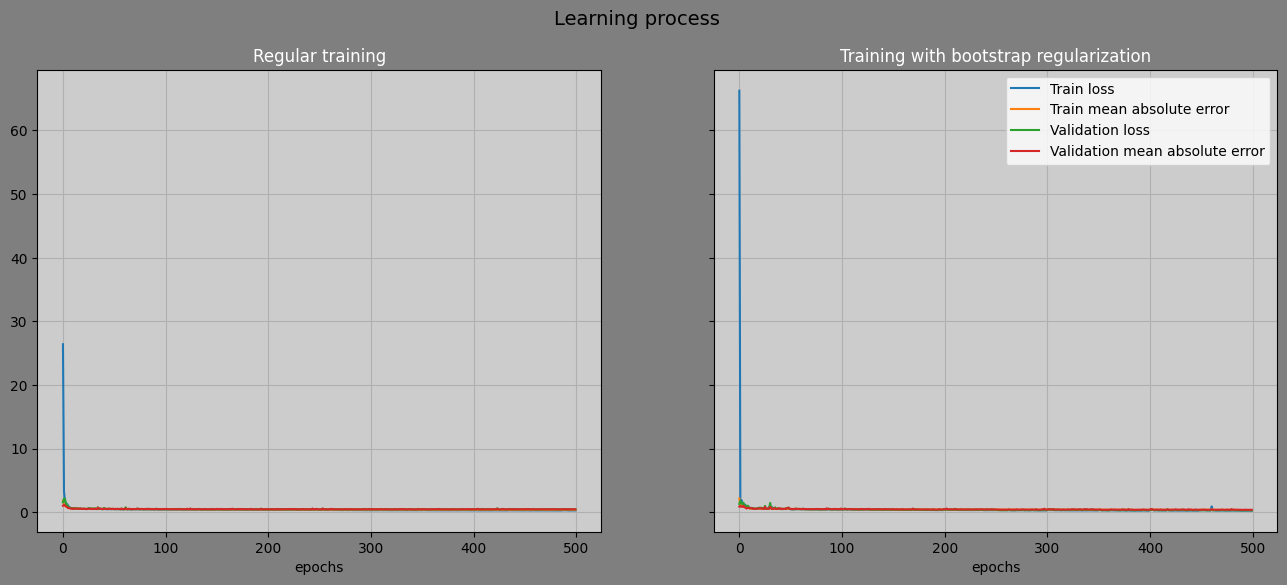

In [12]:
# Now we will vizualize the results of training for both models

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 6), facecolor='tab:gray')
ax[0].set_facecolor('0.8')
ax[0].plot(pd.DataFrame(history_1.history))
ax[0].set_title('Regular training', color='1.0')
ax[0].grid()
ax[0].set_xlabel('epochs')

ax[1].plot(df)
ax[1].set_facecolor('0.8')
ax[1].set_title('Training with bootstrap regularization', color='1.0')
ax[1].grid()
ax[1].set_xlabel('epochs')
fig.suptitle('Learning process', fontsize=14)

plt.legend(['Train loss', 'Train mean absolute error', 'Validation loss', 'Validation mean absolute error'], loc='best')
plt.show()

In [13]:
loss_1, mae_1 = model_1.evaluate(x_test, y_test)
loss_2, mae_2 = model_2.evaluate(x_test, y_test)

result_frame = pd.DataFrame({'Test mean absolute error': [mae_1, mae_2], 
                             'Test loss': [loss_1, loss_2], 
                             '': ['Regular training', 'Boostrap regularization']}).set_index('')

result_frame = result_frame.style.background_gradient(subset='Test loss', cmap='flag')
result_frame


129/129 [==============================] - 1s 3ms/step - loss: 0.4647 - mean_absolute_error: 0.4754


,Test mean absolute error,Test loss
,,
Regular training,0.471587,0.457457
Boostrap regularization,0.475382,0.464699
